In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Cyclists

In [3]:
df_cyclists = pd.read_csv('dataset/df_cyclists_FE.csv')

In [4]:
df_cyclists.head()

,_url,birth_year,weight,height,nationality,BMI
0,bruno-surra,1964.0,68.805369,183.902338,Italy,20.344538
1,gerard-rue,1965.0,74.000000,182.000000,France,22.340297
2,jan-maas,1996.0,69.000000,189.000000,Netherlands,19.316369
3,nathan-van-hooydonck,1995.0,78.000000,192.000000,Belgium,21.158854
4,jose-felix-parra,1997.0,55.000000,171.000000,Spain,18.809206


In [5]:
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6094 non-null   object 
 1   birth_year   6094 non-null   float64
 2   weight       6094 non-null   float64
 3   height       6094 non-null   float64
 4   nationality  6094 non-null   object 
 5   BMI          6094 non-null   float64
dtypes: float64(4), object(2)
memory usage: 285.8+ KB


### Informazioni statistiche di base

In [6]:
df_cyclists.describe()

,birth_year,weight,height,BMI
count,6094.000000,6094.000000,6094.000000,6094.000000
mean,1974.034035,68.701385,179.881275,21.210260
std,15.535361,6.412958,6.437351,1.369224
min,1933.000000,46.199695,154.000000,16.365852
25%,1962.000000,64.133404,175.561356,20.286508
50%,1974.000000,68.762815,180.000000,21.171475
75%,1987.000000,73.000000,184.000000,22.093170
max,2004.000000,94.000000,204.000000,27.770313


### Only a new variable - BMI

In [7]:
df_cyclists['BMI'].value_counts()

BMI
21.604938    46
20.452885    27
20.675803    27
21.461937    27
20.061728    26
             ..
22.835010     1
20.528073     1
17.755682     1
21.616888     1
20.640099     1
Name: count, Length: 3653, dtype: int64

In [8]:
df_cyclists['BMI'].describe()

count    6094.000000
mean       21.210260
std         1.369224
min        16.365852
25%        20.286508
50%        21.171475
75%        22.093170
max        27.770313
Name: BMI, dtype: float64

In [9]:
def sturges_bin_count(df):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df)) + 1))

In [10]:
bins = sturges_bin_count(df_cyclists["BMI"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


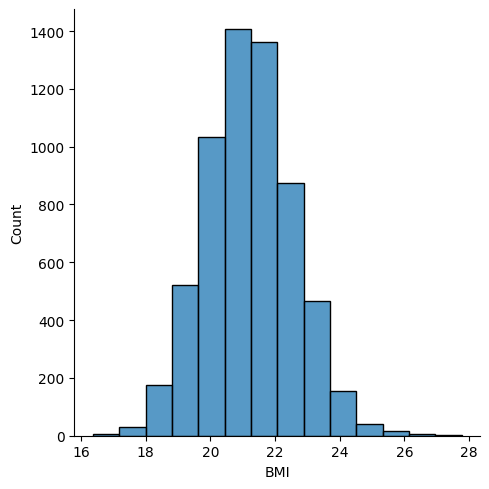

In [11]:
sns.displot(df_cyclists, x="BMI", kind="hist", row_order="desc", bins=bins)

<Axes: xlabel='BMI'>

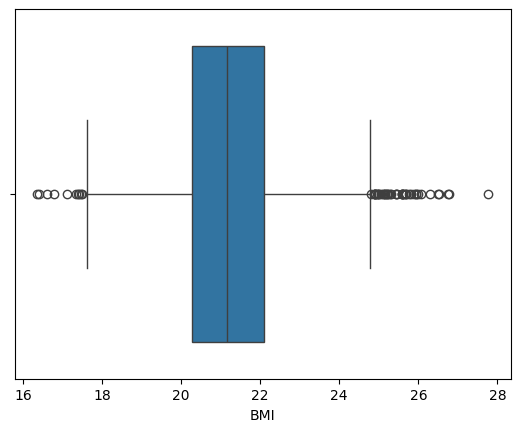

In [14]:
sns.boxplot(x='BMI', data=df_cyclists)

## Races

In [15]:
df_races_no_FE = pd.read_csv('dataset/races.csv')
df_races = pd.read_csv('dataset/df_races_FE.csv')

In [16]:
columns_diff = df_races.columns.difference(df_races_no_FE.columns)

df_races = df_races[columns_diff]
df_races.head()

,avg_delta,consistency_score,delta_std,finish_position_std,period,race_difficulty,team_avg_strength,top_x_finish,top_x_finish_percentage,year
0,2.351351,0.003283,9.455205,18.685480,1970s,0.225995,1117.306216,True,0.675676,1970.0
1,0.000000,0.065637,0.000000,8.141116,1970s,0.225995,1117.306216,True,0.600000,1970.0
2,2.716418,0.001798,14.539190,18.234961,1970s,0.225995,1098.066569,True,0.537313,1970.0
3,3.736842,0.005988,13.421814,7.836705,1970s,0.225995,1098.066569,True,0.763158,1970.0
4,4.714286,0.001331,8.882835,9.860938,1970s,0.225995,1121.314981,True,0.142857,1970.0


In [18]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589110 entries, 0 to 589109
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   avg_delta                589110 non-null  float64
 1   consistency_score        589110 non-null  float64
 2   delta_std                589110 non-null  float64
 3   finish_position_std      589110 non-null  float64
 4   period                   589110 non-null  object 
 5   race_difficulty          589110 non-null  float64
 6   team_avg_strength        589110 non-null  float64
 7   top_x_finish             589110 non-null  bool   
 8   top_x_finish_percentage  589110 non-null  float64
 9   year                     589110 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 41.0+ MB


### Informazioni statistiche di base

In [19]:
df_races.describe()

,avg_delta,consistency_score,delta_std,finish_position_std,race_difficulty,team_avg_strength,top_x_finish_percentage,year
count,589110.000000,589110.000000,589110.000000,589110.000000,589110.000000,589110.000000,589110.000000,589110.000000
mean,7.556331,0.000191,36.149651,42.207103,0.211620,1101.181797,0.094429,2006.181458
std,9.927652,0.005625,108.740971,8.141151,0.208657,26.675288,0.106422,11.461291
min,-20.016064,0.000000,0.000000,0.000000,0.000000,539.333333,0.000000,1970.000000
25%,4.336397,0.000016,17.226875,37.416467,0.046576,1085.969878,0.020115,1999.000000
50%,6.049485,0.000047,24.740227,41.799812,0.135167,1099.504661,0.058651,2008.000000
75%,8.470968,0.000119,36.115339,46.807063,0.325083,1117.959876,0.132948,2015.000000
max,420.000000,1.000000,4154.655828,108.187338,1.000000,1170.673568,1.000000,2023.000000


In [20]:
numeric_columns = df_races.select_dtypes(include=['int64', 'float64']).columns

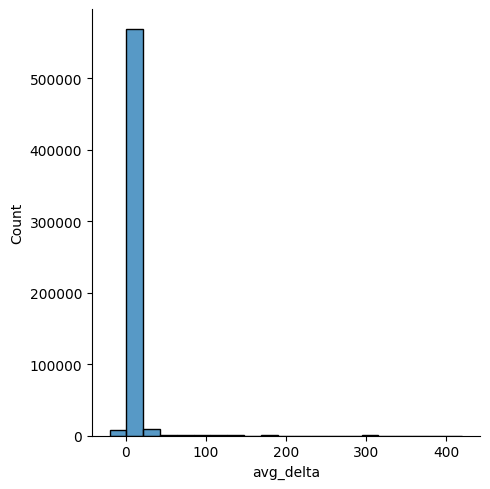

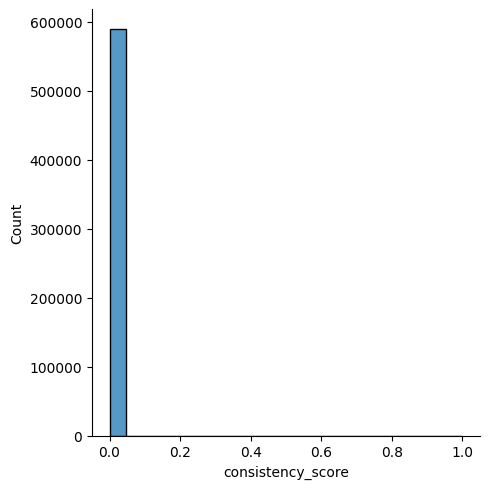

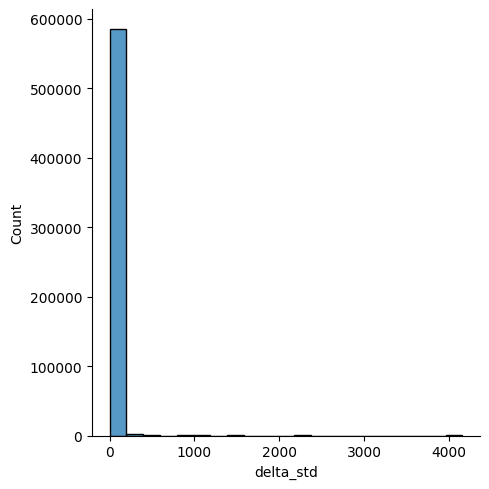

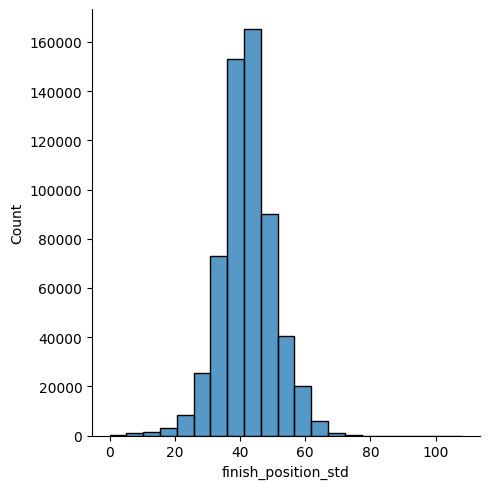

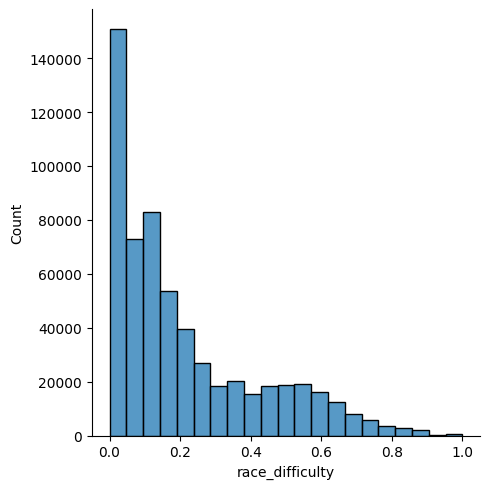

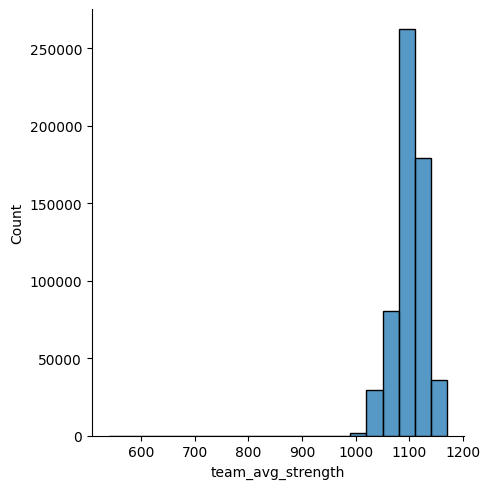

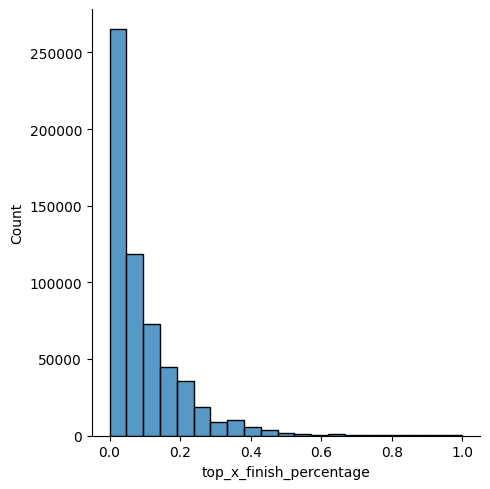

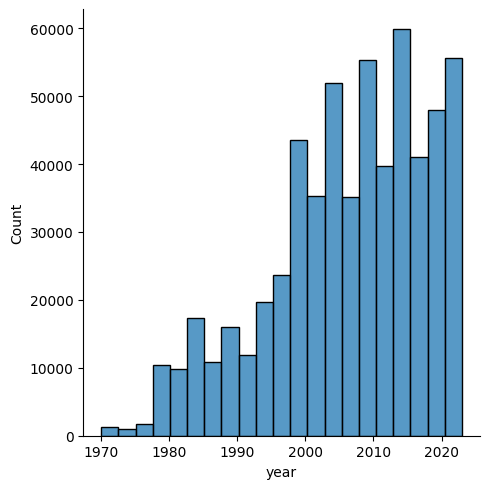

In [21]:
for col in numeric_columns:
    bins = sturges_bin_count(df_races[col])
    sns.displot(df_races, x=col, kind="hist", row_order="desc", bins=bins)

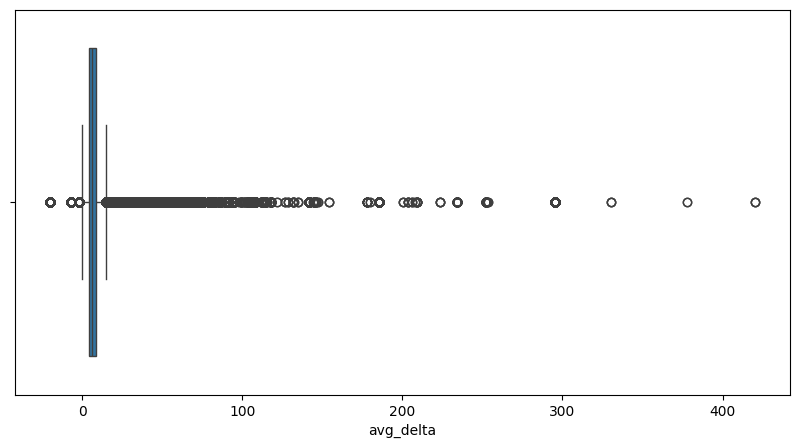

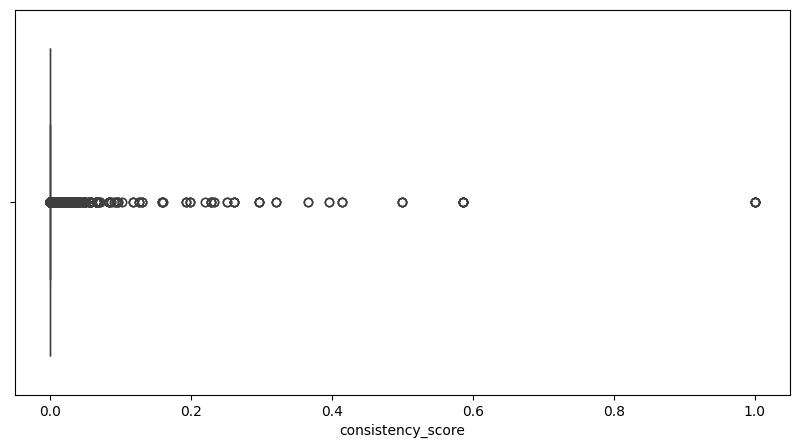

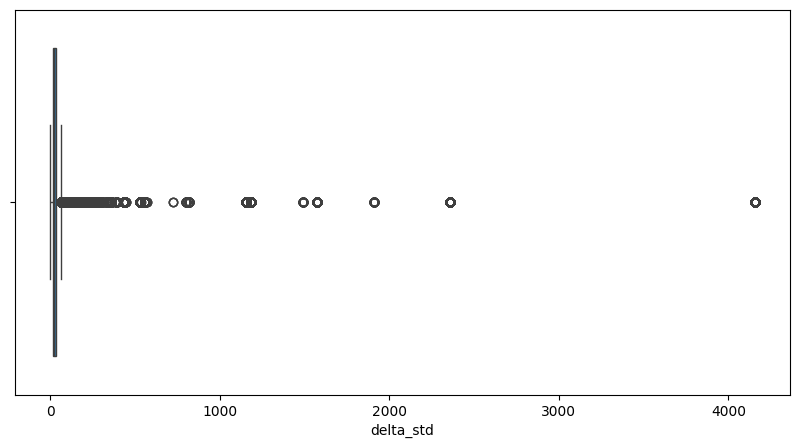

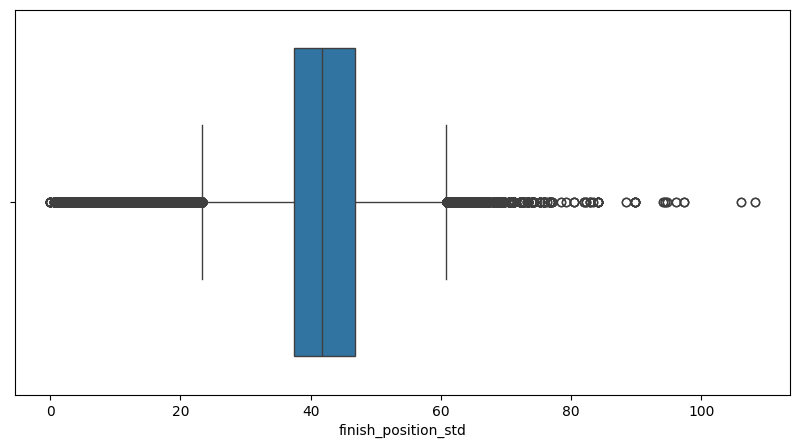

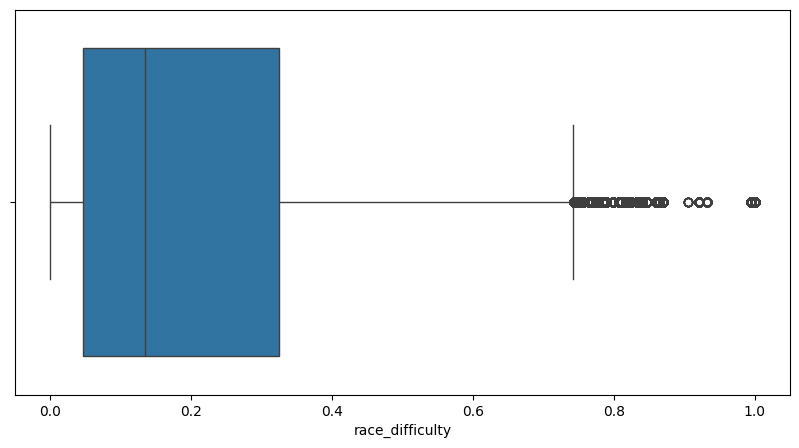

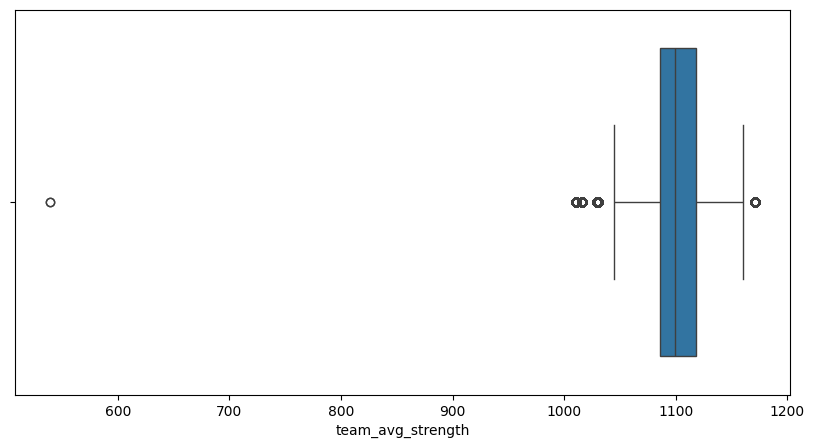

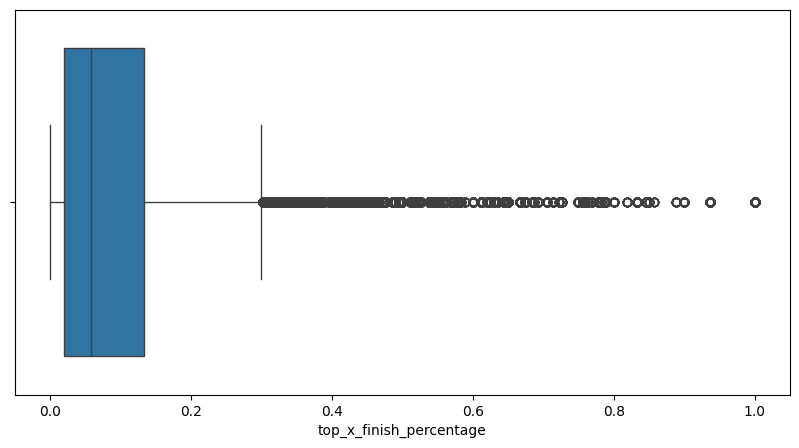

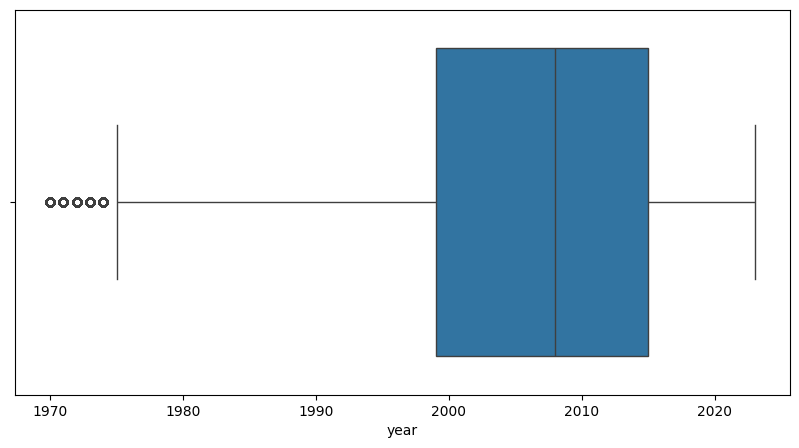

In [22]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_races, x=col)
    plt.xlabel(col)
    plt.show()

## Correlation

### Utility function definition

In [23]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

### Cyclists

In [24]:
df_cyclists = pd.read_csv('dataset/df_cyclists_FE.csv')

In [25]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists)
correlations = correlations(normalized_dataset)
correlations

,birth_year,weight,height,BMI,correlation_type
birth_year,1.000000,-0.026760,0.036535,-0.073774,kendall
weight,-0.026760,1.000000,0.525518,0.453343,kendall
height,0.036535,0.525518,1.000000,-0.029578,kendall
BMI,-0.073774,0.453343,-0.029578,1.000000,kendall
birth_year,1.000000,-0.032474,0.051763,-0.105837,pearson
weight,-0.032474,1.000000,0.727410,0.644398,pearson
height,0.051763,0.727410,1.000000,-0.053469,pearson
BMI,-0.105837,0.644398,-0.053469,1.000000,pearson
birth_year,1.000000,-0.039151,0.053795,-0.108103,spearman
weight,-0.039151,1.000000,0.710217,0.631704,spearman


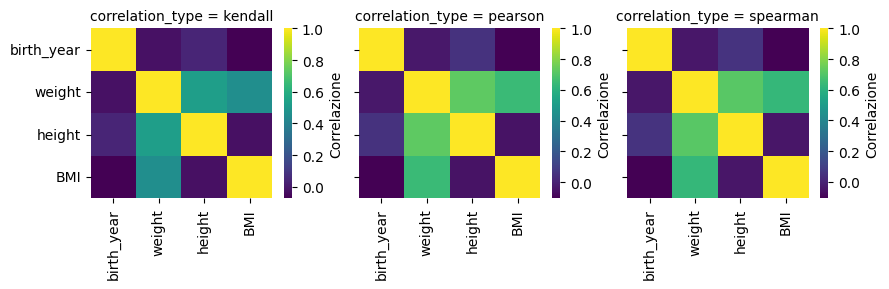

In [26]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

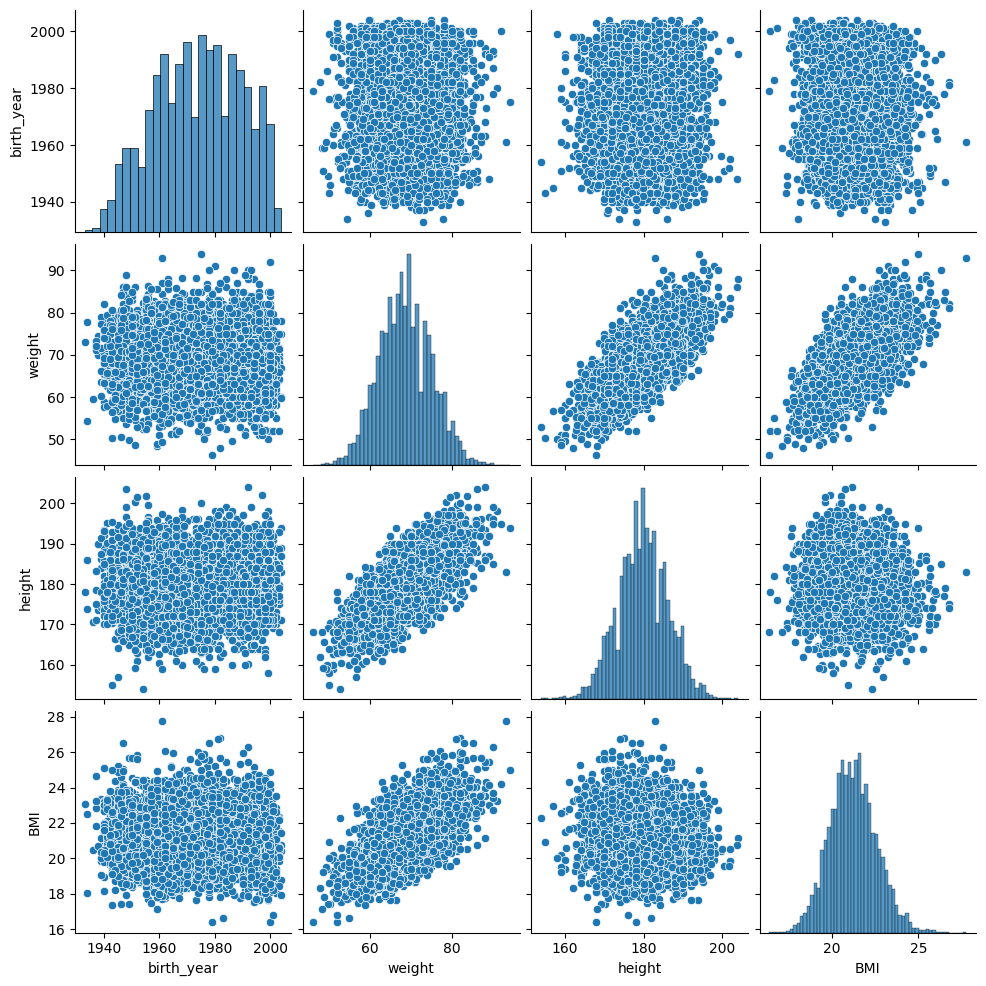

In [27]:
numerical_features = df_cyclists.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_cyclists[numerical_features])
plt.show()

### Cyclists

In [28]:
df_races = pd.read_csv('dataset/df_races_FE.csv')

In [31]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [32]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_races)
correlation_results = correlations(normalized_dataset) 
correlation_results

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,race_difficulty,team_avg_strength,finish_position_std,avg_delta,delta_std,top_x_finish_percentage,consistency_score,correlation_type
points,1.000000,0.487191,0.281338,0.085970,-0.070221,0.388538,0.011255,-0.004916,-0.019489,-0.185093,0.022967,0.031968,0.019342,0.015126,0.024317,0.097602,0.078764,kendall
uci_points,0.487191,1.000000,0.174663,0.079484,0.005080,0.020595,-0.045942,-0.007794,-0.004764,0.027589,0.046384,-0.020402,-0.028459,0.029001,0.006543,0.049217,0.044467,kendall
length,0.281338,0.174663,1.000000,0.306336,0.031461,0.064491,-0.015470,-0.001808,-0.115386,-0.062374,0.199930,0.012663,0.013472,0.005667,0.011542,0.035799,0.025954,kendall
climb_total,0.085970,0.079484,0.306336,1.000000,0.562356,0.013986,-0.023940,0.002983,-0.028266,0.033108,0.816025,0.000411,-0.009568,0.005778,-0.002498,0.003874,0.005872,kendall
profile,-0.070221,0.005080,0.031461,0.562356,1.000000,-0.064943,-0.013485,0.007185,0.076998,0.111352,0.773645,-0.009244,-0.015907,0.004776,-0.011241,-0.029218,-0.020614,kendall
startlist_quality,0.388538,0.020595,0.064491,0.013986,-0.064943,1.000000,0.097236,0.033157,-0.012585,-0.138329,-0.015291,0.041266,0.058891,-0.004129,0.020954,0.076974,0.059609,kendall
position,0.011255,-0.045942,-0.015470,-0.023940,-0.013485,0.097236,1.000000,0.006332,-0.078305,0.084973,-0.017519,-0.010087,0.097055,0.027977,0.034730,-0.228324,-0.233278,kendall
cyclist_age,-0.004916,-0.007794,-0.001808,0.002983,0.007185,0.033157,0.006332,1.000000,-0.006175,0.088045,0.005585,-0.003759,0.013989,-0.013084,0.035502,0.044971,0.035791,kendall
delta,-0.019489,-0.004764,-0.115386,-0.028266,0.076998,-0.012585,-0.078305,-0.006175,1.000000,0.014522,0.006958,0.000103,-0.007848,0.056434,0.026339,0.020571,0.013059,kendall
year,-0.185093,0.027589,-0.062374,0.033108,0.111352,-0.138329,0.084973,0.088045,0.014522,1.000000,0.067628,-0.049190,0.008661,0.046953,-0.027868,-0.151560,-0.128419,kendall


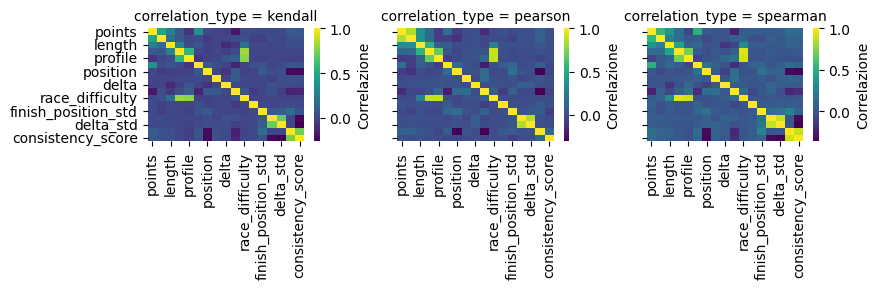

In [33]:
g = sns.FacetGrid(correlation_results, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

### Combination of the two

In [34]:
df_cyclists = pd.read_csv('dataset/df_cyclists_FE.csv')
df_races = pd.read_csv('dataset/df_races_FE.csv')
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')


In [35]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [36]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_merged)
correlations = correlations(normalized_dataset)
correlations

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,...,finish_position_std,avg_delta,delta_std,top_x_finish_percentage,consistency_score,birth_year,weight,height,BMI,correlation_type
points,1.000000,0.487191,0.281338,0.085970,-0.070221,0.388538,0.011255,-0.004916,-0.019489,-0.185093,...,0.019342,0.015126,0.024317,0.097602,0.078764,-0.189232,0.050176,0.013845,0.057726,kendall
uci_points,0.487191,1.000000,0.174663,0.079484,0.005080,0.020595,-0.045942,-0.007794,-0.004764,0.027589,...,-0.028459,0.029001,0.006543,0.049217,0.044467,0.011056,0.027323,0.021940,0.016242,kendall
length,0.281338,0.174663,1.000000,0.306336,0.031461,0.064491,-0.015470,-0.001808,-0.115386,-0.062374,...,0.013472,0.005667,0.011542,0.035799,0.025954,-0.062672,0.026711,0.008171,0.029496,kendall
climb_total,0.085970,0.079484,0.306336,1.000000,0.562356,0.013986,-0.023940,0.002983,-0.028266,0.033108,...,-0.009568,0.005778,-0.002498,0.003874,0.005872,0.029833,-0.012188,-0.001206,-0.016421,kendall
profile,-0.070221,0.005080,0.031461,0.562356,1.000000,-0.064943,-0.013485,0.007185,0.076998,0.111352,...,-0.015907,0.004776,-0.011241,-0.029218,-0.020614,0.106009,-0.025867,-0.000639,-0.036644,kendall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
consistency_score,0.104181,0.062460,0.038607,0.008781,-0.027816,0.087491,-0.344222,0.051118,0.017067,-0.185740,...,0.069245,-0.324814,-0.364926,0.883791,1.000000,-0.209973,-0.091673,-0.150036,0.032364,spearman
birth_year,-0.245937,0.019520,-0.092065,0.043929,0.142096,-0.206700,0.126604,-0.204407,0.017728,0.934718,...,0.017125,0.064777,-0.058159,-0.248998,-0.209973,1.000000,-0.073248,0.072586,-0.191415,spearman
weight,0.066058,0.038200,0.039444,-0.017997,-0.034409,0.046336,0.091543,0.038683,-0.025413,-0.058273,...,0.144978,0.101598,0.144986,-0.026288,-0.091673,-0.073248,1.000000,0.724341,0.633707,spearman
height,0.018276,0.030659,0.012053,-0.001779,-0.000854,0.007303,0.075299,-0.007099,-0.009269,0.073899,...,0.007313,0.079673,0.087885,-0.135555,-0.150036,0.072586,0.724341,1.000000,-0.023520,spearman


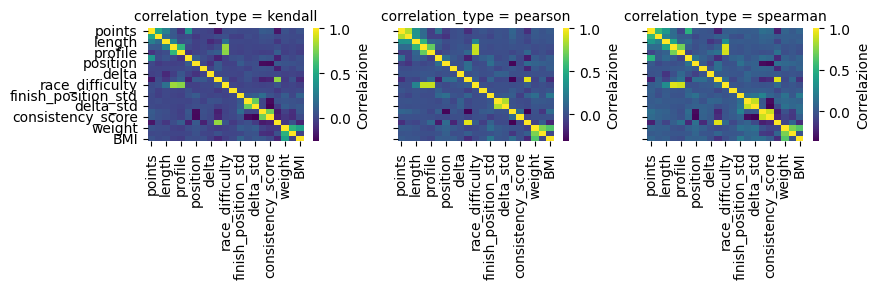

In [37]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()